In [1]:
import ROOT
from itertools import product
from array import array
from math import pow, sqrt

Welcome to JupyROOT 6.28/04


In [2]:
f = ROOT.TFile.Open("results/2017/ROOT/muon/fakerate.root")
h = f.Get("fakerate")
#ptcorr_bins = [10., 15., 20., 25., 35., 50., 70., 100.]   # 20, 35
#abseta_bins = [0., 0.8, 1.579, 2.5]

ptCorr_bins = [10., 15., 20., 30., 50., 100.]        # 30
abseta_bins = [0., 0.9, 1.6, 2.4]

In [3]:
for abseta, ptCorr in product(abseta_bins[:-1], ptCorr_bins[:-1]):
    thisbin = h.FindBin(abseta, ptCorr)
    value, error = h.GetBinContent(thisbin), h.GetBinError(thisbin)
    print(abseta, ptCorr, value, error, error/value*100)

0.0 10.0 0.3580592349021039 0.004156788011265635 1.1609218827723107
0.0 15.0 0.1918197319539892 0.007567497076703297 3.9451087745855435
0.0 20.0 0.1215499282134757 0.01645940189662934 13.541268299000572
0.0 30.0 0.0795461638807007 0.05082853604840076 63.898161229535624
0.0 50.0 0.0972004285730916 0.17105204871902166 175.97869806756668
0.9 10.0 0.4039032800222663 0.004464419838594238 1.105319035376025
0.9 15.0 0.2010007728961893 0.008147138968817209 4.053287383638547
0.9 20.0 0.1560072196722183 0.01669711360190521 10.702782625693203
0.9 30.0 0.104616890935235 0.053678426345966396 51.3095216901418
0.9 50.0 0.1189566490298025 0.19544114599559667 164.29610920414572
1.6 10.0 0.442524793878448 0.0044717126095514936 1.0104999022449748
1.6 15.0 0.2350959086166219 0.008681536201193442 3.692763626674035
1.6 20.0 0.1884737929159273 0.01714142810026555 9.094860264159827
1.6 30.0 0.1322667538386917 0.06304025553207165 47.66145210530648
1.6 50.0 0.1835311679525033 0.20912585840470282 113.94569147994

In [7]:
# prepare canvas and legend
c = ROOT.TCanvas("c", "", 1600, 1800)
pad_up = ROOT.TPad("pad_up", "", 0, 0.25, 1, 1)
pad_up.SetBottomMargin(0.02)
pad_down = ROOT.TPad("pad_down", "", 0, 0, 1, 0.25)
pad_down.SetTopMargin(0.08)
pad_down.SetBottomMargin(0.3)
pad_down.SetGrid()
legend = ROOT.TLegend(0.65, 0.50, 0.9, 0.87)
legend.SetFillStyle(0)
legend.SetBorderSize(0)

info = ROOT.TLatex()
info.SetTextSize(0.035)
info.SetTextFont(42)
logo = ROOT.TLatex()
logo.SetTextSize(0.04)
logo.SetTextFont(61)
extra_logo = ROOT.TLatex()
extra_logo.SetTextSize(0.035)
extra_logo.SetTextFont(52)

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


In [8]:
projections = {}
projections["eta1"] = h.ProjectionY(f"eta{str(abseta_bins[0])}to{str(abseta_bins[1])}", 1, 1)
projections["eta2"] = h.ProjectionY(f"eta{str(abseta_bins[1])}to{str(abseta_bins[2])}", 2, 2)
projections["eta3"] = h.ProjectionY(f"eta{str(abseta_bins[2])}to{str(abseta_bins[3])}", 3, 3)

projections["eta1"].SetLineColor(ROOT.kRed)
projections["eta2"].SetLineColor(ROOT.kGreen)
projections["eta3"].SetLineColor(ROOT.kBlue)

legend.AddEntry(projections["eta1"], f"{abseta_bins[0]} < |#eta| < {abseta_bins[1]}", "lep")
legend.AddEntry(projections["eta2"], f"{abseta_bins[1]} < |#eta| < {abseta_bins[2]}", "lep")
legend.AddEntry(projections["eta3"], f"{abseta_bins[2]} < |#eta| < {abseta_bins[3]}", "lep")

ratios = {}
ratios['eta1'] = projections['eta1'].Clone("ratio1")
ratios['eta2'] = projections['eta2'].Clone("ratio2")
ratios['eta3'] = projections['eta3'].Clone("ratio3")

for bin in range(1, ratios['eta1'].GetNbinsX()+1):
    content = ratios['eta1'].GetBinError(bin)/ratios['eta1'].GetBinContent(bin)
    ratios['eta1'].SetBinContent(bin, content)
    ratios['eta1'].SetBinError(bin, 0)
    ratios['eta1'].SetMarkerColor(2)
for bin in range(1, ratios['eta2'].GetNbinsX()+1):
    content = ratios['eta2'].GetBinError(bin)/ratios['eta2'].GetBinContent(bin)
    ratios['eta2'].SetBinContent(bin, content)
    ratios['eta2'].SetBinError(bin, 0)
    ratios['eta3'].SetMarkerColor(3)
for bin in range(1, ratios['eta3'].GetNbinsX()+1):
    content = ratios['eta3'].GetBinError(bin)/ratios['eta3'].GetBinContent(bin)
    ratios['eta3'].SetBinContent(bin, content)
    ratios['eta3'].SetBinError(bin, 0)
    ratios['eta3'].SetMarkerColor(4)

for hist in projections.values():
    hist.SetTitle("")
    hist.SetStats(0)
    hist.SetLineWidth(2)
    hist.GetXaxis().SetLabelSize(0)
    hist.GetXaxis().SetTitle("p_{T}^{corr}")
    hist.GetXaxis().SetRangeUser(10., 50.)
    hist.GetYaxis().SetRangeUser(0., 1.) 
    hist.GetYaxis().SetTitle("fake rate (#mu)")
    
for hist in ratios.values():
    hist.SetStats(0)
    hist.SetTitle("")
    hist.GetXaxis().SetTitle("p_{T}^{corr}")
    hist.GetXaxis().SetRangeUser(10., 50.)
    hist.GetXaxis().SetTitleSize(0.1)
    hist.GetXaxis().SetTitleOffset(0.8)
    hist.GetXaxis().SetLabelSize(0.08)
    hist.GetYaxis().SetRangeUser(0., 1.)
    hist.GetYaxis().SetTitle("#Delta fr/fr")
    hist.GetYaxis().CenterTitle()
    hist.GetYaxis().SetTitleSize(0.1)
    hist.GetYaxis().SetTitleOffset(0.4)
    hist.GetYaxis().SetLabelSize(0.08)
    hist.SetMarkerStyle(8)
    hist.SetMarkerSize(0.7)

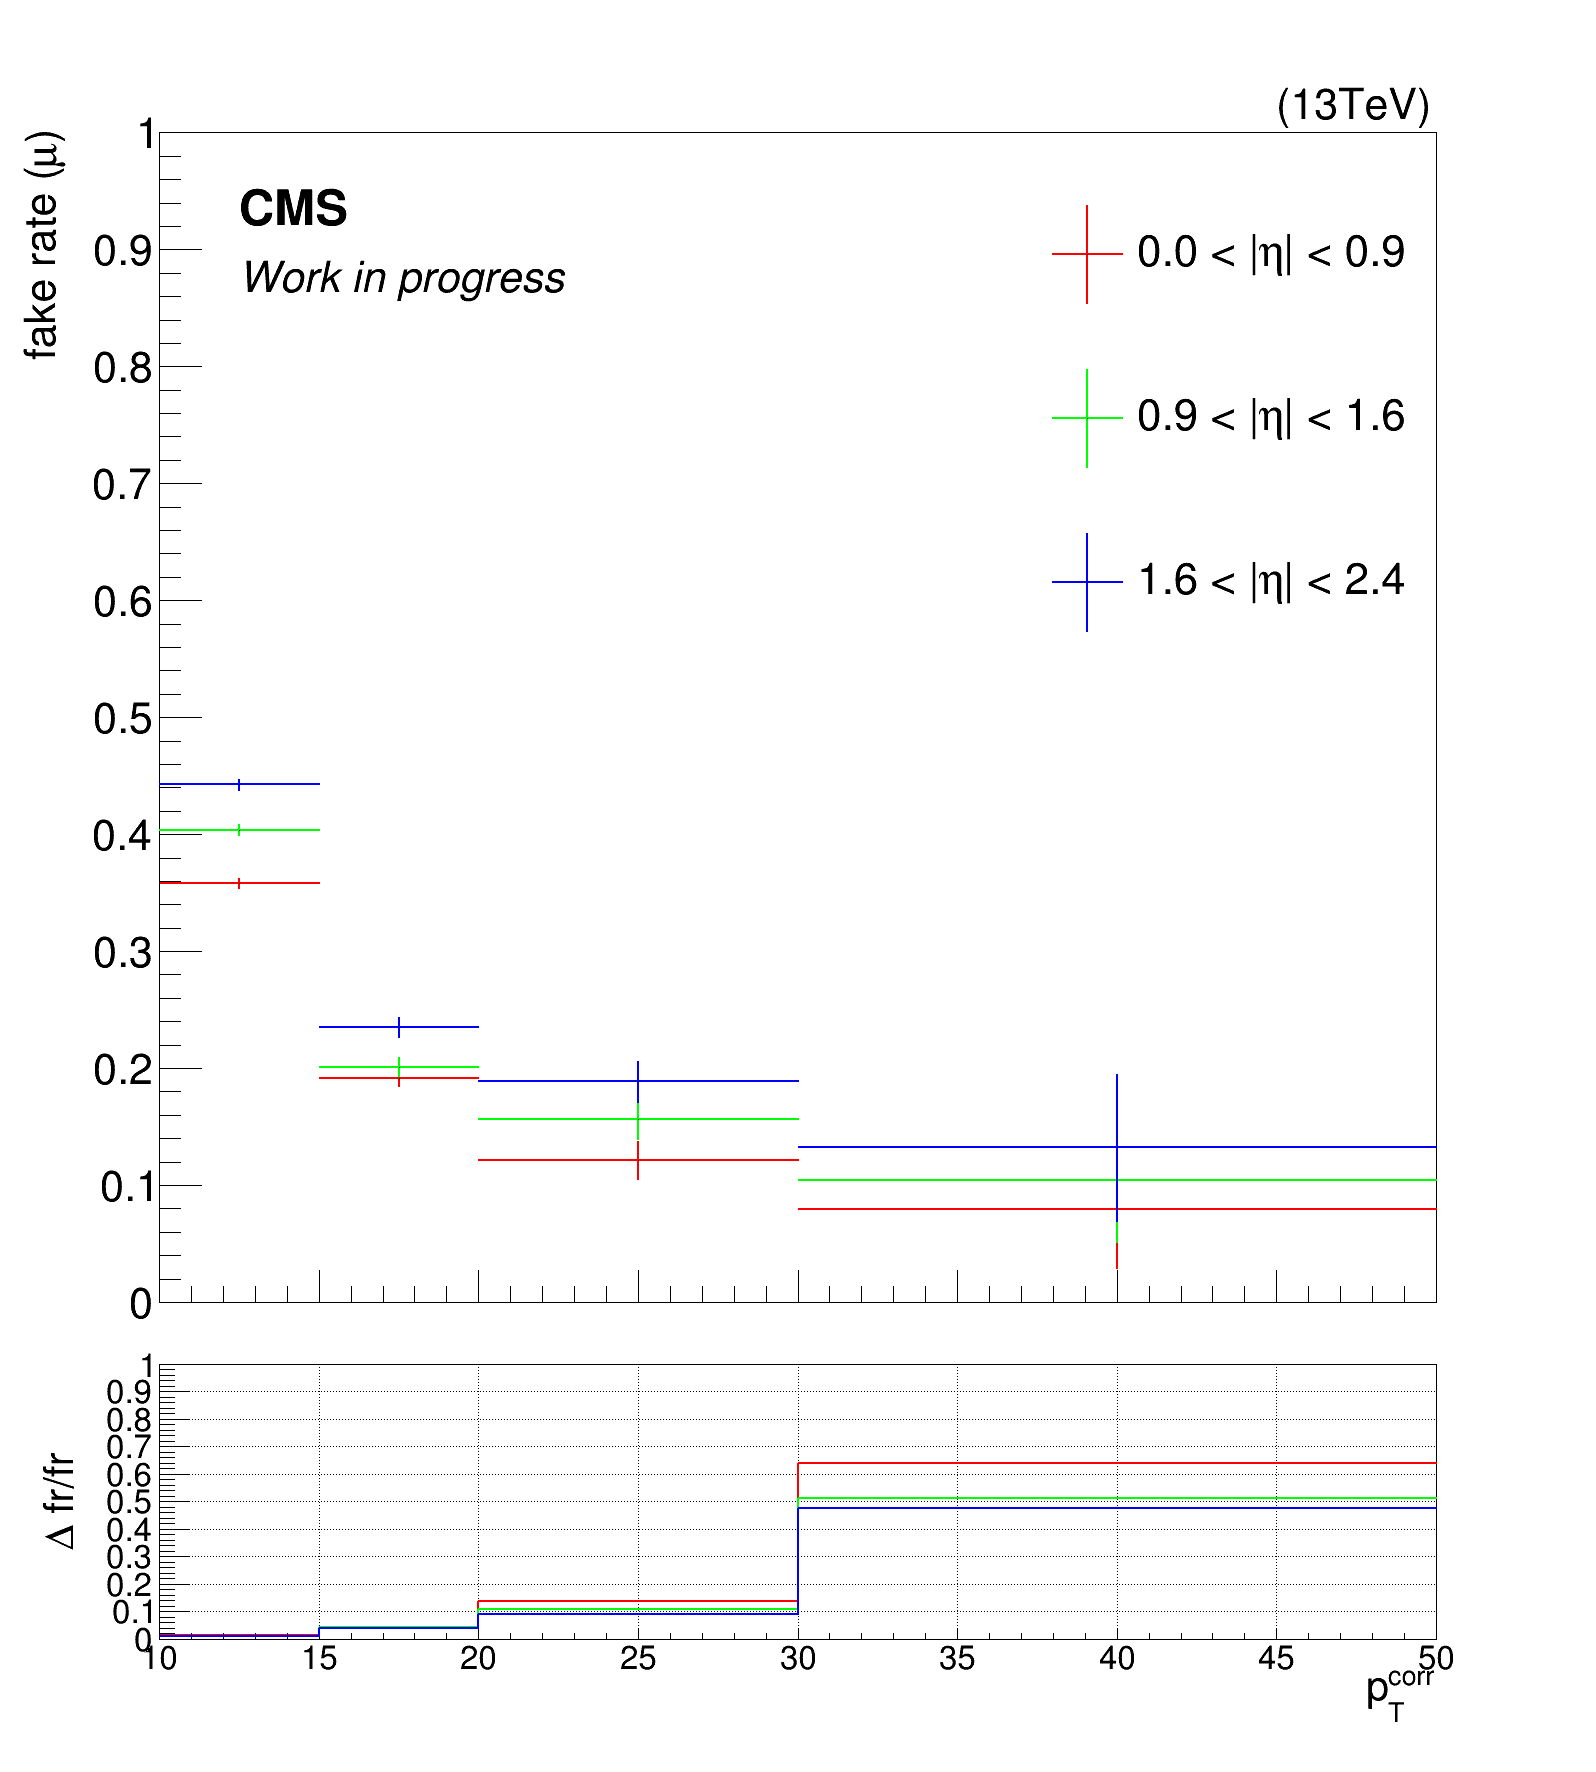

In [10]:
pad_up.cd()
projections["eta1"].Draw()
projections["eta2"].Draw("same")
projections["eta3"].Draw("same")
legend.Draw("same")
info.DrawLatexNDC(0.80, 0.91, "(13TeV)")
logo.DrawLatexNDC(0.15, 0.83, "CMS")
extra_logo.DrawLatexNDC(0.15, 0.78, "Work in progress")
pad_down.cd()
#ratios["eta1"].Draw("L")
ratios["eta1"].Draw()
ratios["eta2"].Draw("same")
ratios["eta3"].Draw("same")
c.cd()
pad_up.Draw()
pad_down.Draw()
c.Draw()